In [1]:
%matplotlib notebook

# Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit2020_csv = "MetroTransit_2020.csv"

# Read with Pandas
metrotransit2020_df = pd.read_csv(metrotransit2020_csv)
metrotransit2020_df.head()

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
0,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,1.0,19337,Leamington Ramp & Lower - Gate #7,114.650000,24.766667
1,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,2.0,19277,3rd Ave S & 11th St S,10.366667,2.733333
2,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,3.0,41911,2nd Ave S & Convention Center,35.000000,1.166667
3,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,4.0,17988,Nicollet Mall & Alice Rainville,119.566667,3.533333
4,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,5.0,17990,Nicollet Mall & 11th St S,140.816667,4.050000


In [2]:
sample_df = metrotransit2020_df.sample(n = 500)

ons = sample_df["ons"]
offs = sample_df["offs"]

plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Ons")
plt.ylabel("Offs")
plt.show

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

In [33]:
# Line plot showing week-to-week change for highest ON location

highest_on_df = metrotransit2020_df.loc[metrotransit2020_df["location"]=="7th & Nicollet Station"]
# highest_on_df
clean_highest_on_df = pd.DataFrame(highest_on_df,columns=["week_of","ons","offs","trip_cnt"])
clean_highest_on_df
# summary_ons = clean_highest_on_df.groupby("week_of")
# summary_ons.head()

,week_of,ons,offs,trip_cnt
2496,1/27/2020,161.566667,26.300000,35
2497,1/27/2020,161.566667,26.300000,35
5648,1/27/2020,0.000000,9.550000,5
6193,1/27/2020,0.200000,16.850000,4
7080,1/27/2020,469.916667,508.533333,124
...,...,...,...,...
168800,4/13/2020,171.083333,196.000000,82
168801,4/13/2020,85.750000,100.666667,82
173152,4/13/2020,5.166667,2.000000,3
176058,4/13/2020,473.583333,61.500000,87


In [34]:
# group by "week of"
summary_ons = clean_highest_on_df.groupby("week_of")

# then do the math
ons_sum = summary_ons["ons"].sum()
trips_sum = summary_ons["trip_cnt"].sum()

summary_table = (pd.DataFrame({
    "Ons": ons_sum,
    "Trips": trips_sum
})).round(2)
# summary_table["week_of"] = pd.to_datetime("week_of")
# summary_table["week_of"] = summary_table["week_of"].astype('datetime64[ns]') 

summary_table

,Ons,Trips
week_of,,
1/27/2020,3406.72,549
2/10/2020,3333.47,549
2/17/2020,3154.35,549
2/24/2020,3497.45,549
2/3/2020,3469.03,549
3/16/2020,2233.50,549
3/2/2020,3517.12,549
3/30/2020,1513.33,406
3/9/2020,3342.85,549


<IPython.core.display.Javascript object>


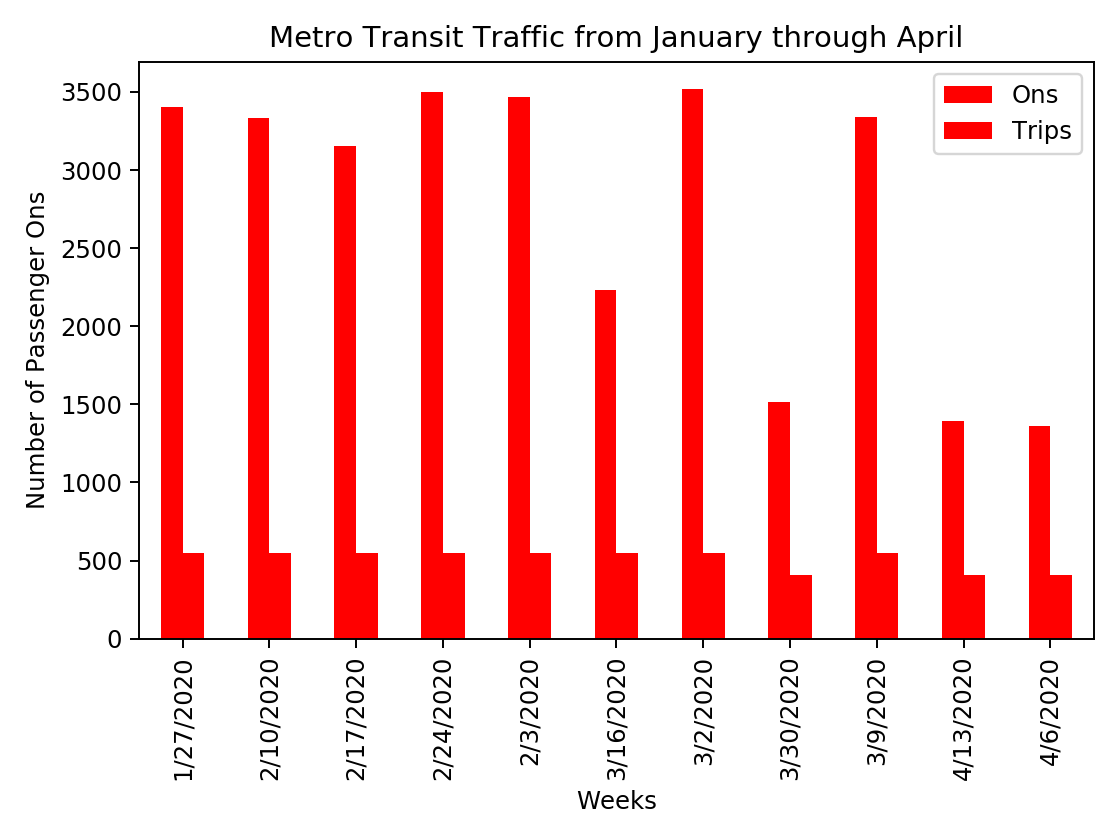

In [8]:
summary_table.plot(kind="bar", facecolor="red")
plt.title("Metro Transit Traffic from January through April")
plt.xlabel("Weeks")
plt.ylabel("Number of Passenger Ons")
plt.show()
plt.tight_layout()

In [ ]:
highest_on_df.groupby("week_of")
highest_on_df

In [ ]:
# Line plot showing week-to-week change for highest OFF location

highest_off_df = metrotransit2020_df.loc[metrotransit2020_df["location"]=="Nicollet Mall & 7th St S"]
highest_off_df.head()